by [@tozCSS](https://twitter.com/tozCSS)

<img style="float: right;" src="data/vtr.png">
This notebook contains some maps and plots regarding the last two general election results in Turkey (held in Jun 7, 2015 and Nov 1, 2015).

I also estimate the vote transition rates (the image on the right) using a recursive method developed by [Andreadis](http://www.tandfonline.com/doi/abs/10.1080/17457280902799089) (An R script and the instructions are also made [available](http://www.polres.gr/en/vtr)). To get the exact transition values you can mouse-over the links in the interactive Sankey diagram at the bottom of this notebook. 

Finally, I respond to the fraud claims due to the high increase in the number of registered voters (and valid votes) in 5 months by looking at the correlation between the changes in party shares and the valid votes.

## Data Source
Both Jun 7 and Nov 1 election results are scraped from the Nov 1, 2015 [election results page](http://www.yenisafak.com/secim-2015-kasim/secim-sonuclari) of the Yenisafak daily. Scraped datasets are available in two files as [Nov 1,2015](data/nov.csv) and [Jun 7,2015](data/jun.csv) in csv format.

[UPDATE] : Town level data added. [Nov 1,2015](data/nov_towns.csv) and [Jun 7,2015](data/jun_towns.csv) 

## Election Results Maps
I created maps for the last two general election results of Turkey for four parties with different legends. If you click on any of the cities in those maps (below), vote shares of the four parties are shown for that particular election.

The colors in these maps represent the party vote share in those cities. Since one of the more interesting questions regarding the Nov 1, 2015 election is in which cities AKP increased its votes, I also created its Jun 7, 2015 election density map to facilitate us seeing the change.

## Vote Share Scatter Plots of Each Party per City for the Last Two Elections
For all of the parties, their vote shares in the last two elections is compared in a scatter plot where the dots represent the cities and their colors represent the geographic region they belong to. One interesting pattern for example is that unlike other parties, CHP increased its vote share in some cities and lost some in others. On the other hand we see that AKP increased its vote share in every city, whereas MHP and HDP lost their shares almost in every single city.

In [1]:
import json
import pandas as pd
from unidecode import unidecode
import folium
from IPython.display import HTML
from os import chdir
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

In [2]:
#read YSK data
df = pd.read_csv('data/ysk.csv')
df = df.rename(columns={'AK PARTİ':'AKP','İL ADI':'il','İLÇE ADI':'ilce','OY KULLANAN SEÇMEN SAYISI':'kullanan','SEÇMEN SAYISI':'kayitli','GEÇERLİ OY TOPLAMI':'gecerli','GEÇERSİZ OY TOPLAMI':'gecersiz','MAHALLE/KÖY':'mahalle','SANDIK NO':'sandik','İTİRAZSIZ GEÇERLİ OY SAYISI':'itirazsiz','İTİRAZLI GEÇERLİ OY SAYISI':'itirazli'})
df = df.fillna(0)

In [3]:
parties = ['AKP','CHP','MHP','HDP','OTHERS']
vals = ['il','ilce','mahalle','sandik','kayitli','kullanan','itirazsiz','itirazli','gecerli','gecersiz']
others = set(df.columns) - set(parties+vals)
df['OTHERS'] = df[list(others)].sum(axis=1)
df = df[parties+vals]
rates = [p+'R' for p in parties]
df[rates] = df[parties].div(df.gecerli,axis='index')

In [4]:
#df.pivot_table(index='il')[rates].plot(kind='barh',stacked=True,figsize=(10,25),xlim=(0,1),color=['orange','r','g','purple','grey'])
il = df.pivot_table(index='il')[rates]
il.iplot(kind='bar',barmode='stack', filename='ysk/il',colors=['orange','red','green','purple','grey'],legend=False)

In [2]:
#read the data
nov = pd.read_csv('data/nov.csv')
jun = pd.read_csv('data/jun.csv')
nt = pd.read_csv('data/nov_towns.csv')
jt = pd.read_csv('data/jun_towns.csv')
nt = nt[nt.AKP > 0] #this is to filter some towns
jt = jt[jt.AKP > 0] #with all zeros in Yenisafak site
# see for example row of ondokuzmayis here: http://www.yenisafak.com/secim-2015-kasim/samsun-ili-secim-sonuclari

In [3]:
def create_map(is_nov,threshold_scale,fill_color,party):
    chdir('maps/')
    mapname = party+'_share_nov' if is_nov else party+'_share_jun'
    electiondate = 'Nov 1, 2015' if is_nov else 'Jun 7, 2015'
    tr_geo = 'tr_nov.geojson' if is_nov else 'tr_jun.geojson'
    df = nov if is_nov else jun
    tr = folium.Map(location=[39.5, 35], zoom_start=6, tiles='Mapbox Bright')
    tr.geo_json(geo_path=tr_geo, data=df, data_out=mapname+'.json',
                columns=['city', party],
                threshold_scale=threshold_scale,
                key_on='feature.properties.name',
                fill_color=fill_color, fill_opacity=0.7, line_opacity=0.2,
                legend_name=party+' Vote Shares (%), '+electiondate+' Turkish General Elections')
    tr.create_map(path=mapname+'.html')
    chdir('..')
    return HTML('<iframe src=maps/'+mapname+'.html style="width: 100%; height: 500px; border: none"></iframe>')

In [4]:
# AKP Vote Shares (%), Nov 1, 2015 Turkish General Elections
create_map(True,[15,25,35,45,55,65],'YlOrRd','AKP')

In [5]:
# Vote Shares (%), Jun 7, 2015 Turkish General Elections
create_map(False,[15,25,35,45,55,65],'YlOrRd','AKP')

In [6]:
# CHP Vote Shares (%), Nov 1, 2015 Turkish General Elections
create_map(True,[10,15,20,25,30,35],'PuRd','CHP')

In [7]:
# CHP Vote Shares (%), Jun 7, 2015 Turkish General Elections
create_map(False,[10,15,20,25,30,35],'PuRd','CHP')

In [8]:
# MHP Vote Shares (%), Nov 1, 2015 Turkish General Elections
create_map(True,[5,10,15,20,25,30],'GnBu','MHP')

In [9]:
# MHP Vote Shares (%), Jun 7, 2015 Turkish General Elections
create_map(False,[5,10,15,20,25,30],'GnBu','MHP')

In [10]:
# HDP Vote Shares (%), Nov 1, 2015 Turkish General Elections
create_map(True,[5,10,15,20,25,30],'BuPu','HDP')

In [11]:
# HDP Vote Shares (%), Jun 7, 2015 Turkish General Elections
create_map(False,[5,10,15,20,25,30],'BuPu','HDP')

In [ ]:
#Scatter plot
import plotly.plotly as py
from plotly.graph_objs import *
from palettable.colorbrewer.qualitative import Dark2_7 as colmap

il = pd.read_csv('data/city_meta.csv',usecols=['il','bolge'])
colors = dict(zip(il['bolge'].unique().tolist(),colmap.hex_colors))
parties = ['AKP', 'CHP','MHP','HDP']
jun['bolge'] = il['bolge']
nov['bolge'] = il['bolge']

for p in parties:
    lim = max(nov[p].max(),jun[p].max())
    #each region is a trace, otherwise they do not show up in the legend
    traces = [Scatter(x=jun[jun.bolge==b][p],y=nov[nov.bolge==b][p],
                      mode='markers', text=il[il.bolge==b]['il'], name=b,
                      marker=Marker(color=v)) for b,v in colors.items()]
    traces.append(Scatter(x=[0,lim],y=[0,lim],mode='lines', name='y=x',
                        line=Line(color='grey',dash='dash')))
    data = Data(traces)
    layout = Layout(title=p+' Nov 1, 2015 vs Jun 7, 2015 Vote Shares',
                    autosize=True,
                    xaxis=XAxis(title=p+" Jun 7, 2015 Vote Shares",zeroline=False),
                    yaxis=YAxis(title=p+" Nov 1, 2015 Vote Shares",zeroline=False),
                    legend=Legend(x=.01,y=1))
    fig = Figure(data=data,layout=layout)
    url = py.plot(fig,filename= p+' Nov 1, 2015 vs Jun 7, 2015 Vote Shares')

In [12]:
HTML("""<div><a href="https://plot.ly/~toz/828/" target="_blank" title="AKP Nov 1, 2015 vs Jun 7, 2015 Vote Shares" style="display: block; text-align: center;"><img src="https://plot.ly/~toz/828.png" alt="AKP Nov 1, 2015 vs Jun 7, 2015 Vote Shares" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a><script data-plotly="toz:828"  src="https://plot.ly/embed.js" async></script></div>""")

In [13]:
HTML("""<div><a href="https://plot.ly/~toz/830/" target="_blank" title="CHP Nov 1, 2015 vs Jun 7, 2015 Vote Shares" style="display: block; text-align: center;"><img src="https://plot.ly/~toz/830.png" alt="CHP Nov 1, 2015 vs Jun 7, 2015 Vote Shares" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a><script data-plotly="toz:830"  src="https://plot.ly/embed.js" async></script></div>""")

In [14]:
HTML("""<div><a href="https://plot.ly/~toz/832/" target="_blank" title="MHP Nov 1, 2015 vs Jun 7, 2015 Vote Shares" style="display: block; text-align: center;"><img src="https://plot.ly/~toz/832.png" alt="MHP Nov 1, 2015 vs Jun 7, 2015 Vote Shares" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a><script data-plotly="toz:832"  src="https://plot.ly/embed.js" async></script></div>""")

In [15]:
HTML("""<div><a href="https://plot.ly/~toz/834/" target="_blank" title="HDP Nov 1, 2015 vs Jun 7, 2015 Vote Shares" style="display: block; text-align: center;"><img src="https://plot.ly/~toz/834.png" alt="HDP Nov 1, 2015 vs Jun 7, 2015 Vote Shares" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a><script data-plotly="toz:834"  src="https://plot.ly/embed.js" async></script></div>""")

In [16]:
HTML("""<iframe width="50%" height="450" src="//jsfiddle.net/v5rw0y75/39/embedded/result" allowfullscreen="allowfullscreen" frameborder="0"></iframe>""")

In [17]:
print('Total increase in the registered voters:',nov.registered.sum() - jun.registered.sum())
print('Total increase in the valid votes:',nov.valid.sum() - jun.valid.sum())

Total increase in the registered voters: 1555664.0
Total increase in the valid votes: 1769286.0


Some claimed that it is not normal to have such high number of registered voters (or valid votes) increase in five months. It smells fraud to many. However, I couldn't find any support to these claims in the city level data: there is no significant positive or negative correlation between the changes in the valid votes and changes in any of the party shares. [See the output of the following cell]

In [18]:
#check the correlation of change in registered voters with the change in the party shares
parties = ['AKP', 'CHP','MHP','HDP','others']
change = nov[parties] - jun[parties]
change['registered'] = (nov['registered'] - jun['registered'])/nov['registered']
change.index = nov['city']
change.corr() #change in registered voters vs change in party shares

,AKP,CHP,MHP,HDP,others,registered
AKP,1.000000,-0.250031,-0.345152,-0.348651,-0.170495,-0.120211
CHP,-0.250031,1.000000,0.004348,-0.253937,-0.030682,0.002432
MHP,-0.345152,0.004348,1.000000,-0.465819,-0.334473,0.215103
HDP,-0.348651,-0.253937,-0.465819,1.000000,0.061552,0.049348
others,-0.170495,-0.030682,-0.334473,0.061552,1.000000,-0.156149
registered,-0.120211,0.002432,0.215103,0.049348,-0.156149,1.000000


In [19]:
nt.merge(jt,on=['city','town'],suffixes=('_n','_j')) #nov and jun combined

,city,town,AKP_n,CHP_n,MHP_n,HDP_n,others_n,AKP_j,CHP_j,MHP_j,HDP_j,others_j
0,Adana,ALADAĞ,57.02,11.91,27.67,0.35,1.02,50.09,11.50,33.47,0.51,1.75
1,Adana,CEYHAN,33.10,27.70,21.82,15.43,0.48,25.84,25.84,27.22,18.27,1.19
2,Adana,ÇUKUROVA,28.06,43.19,21.55,5.35,0.57,23.15,40.80,25.79,7.29,1.47
3,Adana,FEKE,54.69,15.14,25.56,0.27,1.00,47.01,15.32,31.49,0.67,2.09
4,Adana,İMAMOĞLU,53.09,18.22,24.42,1.68,1.00,45.92,22.17,25.52,2.37,2.20
5,Adana,KARAİSALI,59.73,9.45,27.77,0.41,0.75,55.30,9.36,30.95,0.62,1.63
6,Adana,KARATAŞ,27.17,40.15,26.17,4.94,0.34,23.22,41.66,26.37,6.69,0.78
7,Adana,KOZAN,50.13,18.25,28.12,0.61,0.99,42.90,20.71,30.72,1.29,2.37
8,Adana,POZANTI,52.71,20.43,22.92,1.00,0.98,45.38,21.22,27.08,1.81,2.42
9,Adana,SAİMBEYLİ,54.62,11.06,30.83,0.35,0.79,48.36,11.86,34.82,0.55,1.40


In [20]:
#let's look at the towns who changed their party preference in favor of AKP the most
df = nt[parties]-jt[parties]
df.index = nt.town + ', ' + nt.city
df = df.sort('AKP',ascending=False)
df.ix[:25]

,AKP,CHP,MHP,HDP,others
"KÖPRÜKÖY, Erzurum",34.98,0.04,-6.89,-26.60,-0.66
"AKÇAKALE, Şanlıurfa",30.52,-2.87,-19.40,-3.14,-0.45
"HARRAN, Şanlıurfa",28.53,-0.98,-24.85,-1.19,-0.48
"ELEŞKİRT, Ağrı",27.88,-0.08,-1.10,-24.54,-1.32
"SİVEREK, Şanlıurfa",24.10,-5.66,1.18,-7.66,-0.28
"HİLVAN, Şanlıurfa",22.28,-7.43,2.64,-4.70,-0.69
"Merkez, Iğdır",21.20,-1.68,-16.85,-2.86,-0.03
"HAMUR, Ağrı",20.83,0.99,-0.15,-19.98,-1.31
"PASİNLER, Erzurum",19.77,-0.02,-12.80,-4.79,-1.65
"ÇERMİK, Diyarbakır",19.62,0.81,-0.41,-13.52,-4.93


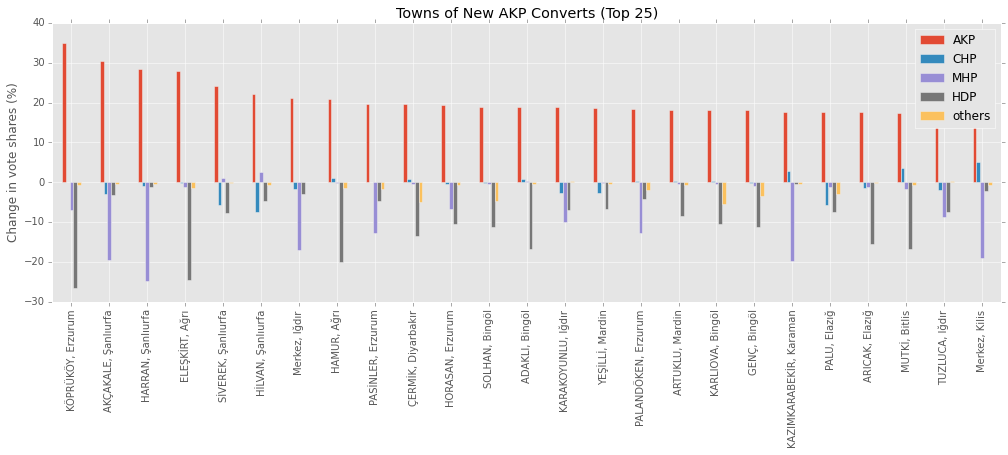

In [21]:
ax = df.ix[:25].plot(kind='bar',figsize=(17,5),title='Towns of New AKP Converts (Top 25)')
ax.set_ylabel("Change in vote shares (%)");

In [22]:
df.sort('CHP',ascending=False).ix[:25]

,AKP,CHP,MHP,HDP,others
"SAMANDAĞ, Hatay",0.33,13.49,0.19,6.88,-0.63
"HANAK, Ardahan",2.26,12.45,3.94,-4.25,-10.58
"PEHLİVANKÖY, Kırklareli",0.11,11.83,-11.08,-0.19,0.06
"PÜLÜMÜR, Tunceli",-0.42,10.20,-1.08,-7.82,-0.38
"PERTEK, Tunceli",1.83,9.22,-2.98,-7.97,-0.25
"SARAY, Tekirdağ",6.03,8.93,-13.57,-0.84,-0.54
"NAZIMİYE, Tunceli",-0.74,8.87,-0.43,-7.11,0.02
"Merkez, Tunceli",-1.09,8.86,-4.22,-3.21,-0.38
"BABAESKİ, Kırklareli",1.04,8.60,-8.69,-0.31,-0.03
"Merkez, Ardahan",7.75,8.32,1.76,-7.15,-9.12


In [23]:
df.sort('MHP',ascending=False).ix[:25]

,AKP,CHP,MHP,HDP,others
"HANAK, Ardahan",2.26,12.45,3.94,-4.25,-10.58
"TAŞOVA, Amasya",2.54,-4.18,3.04,-0.35,-0.58
"HİLVAN, Şanlıurfa",22.28,-7.43,2.64,-4.70,-0.69
"ÇILDIR, Ardahan",11.02,5.23,2.32,-1.88,-13.84
"HEKİMHAN, Malatya",3.40,-4.00,1.95,-0.76,-0.73
"Merkez, Ardahan",7.75,8.32,1.76,-7.15,-9.12
"GÜLNAR, Mersin",7.26,-8.27,1.29,-0.33,-0.61
"SİVEREK, Şanlıurfa",24.10,-5.66,1.18,-7.66,-0.28
"YENİCE, Karabük",10.91,-10.06,1.15,-0.15,-1.43
"SÖKE, Aydın",4.31,-1.46,0.61,-2.84,-0.43


In [24]:
df.sort('HDP',ascending=False).ix[:25]

,AKP,CHP,MHP,HDP,others
"SAMANDAĞ, Hatay",0.33,13.49,0.19,6.88,-0.63
"DEFNE, Hatay",0.29,0.83,-0.37,3.57,-0.06
"GÜÇLÜKONAK, Şırnak",0.44,-0.43,-2.51,2.54,-0.18
"BEYTÜŞŞEBAP, Şırnak",0.07,0.76,-1.82,1.43,0.00
"CİZRE, Şırnak",0.63,0.03,-0.66,1.27,-0.87
"ULUDERE, Şırnak",1.23,0.20,-2.27,1.06,-0.19
"ARSUZ, Hatay",2.50,-0.40,-0.46,0.34,-0.35
"YAYLADAĞI, Hatay",5.60,-2.02,-2.10,0.25,-1.00
"ÇUKURCA, Hakkari",1.83,-0.35,-1.56,0.18,-0.22
"BOĞAZKALE, Çorum",7.70,-0.32,-6.85,0.18,-1.23


In [25]:
df.sort('AKP').ix[:25] #bottom 25 towns among 970 in turning to AKP

,AKP,CHP,MHP,HDP,others
"DİCLE, Diyarbakır",-5.57,0.24,-0.61,-10.56,16.75
"Merkez, Tunceli",-1.09,8.86,-4.22,-3.21,-0.38
"NAZIMİYE, Tunceli",-0.74,8.87,-0.43,-7.11,0.02
"OVACIK, Tunceli",-0.63,7.64,-1.68,-4.51,-0.30
"PÜLÜMÜR, Tunceli",-0.42,10.20,-1.08,-7.82,-0.38
"DATÇA, Muğla",-0.23,5.67,-2.31,-1.26,-1.26
"MAZGİRT, Tunceli",-0.03,2.63,-0.75,-2.18,0.35
"BEYTÜŞŞEBAP, Şırnak",0.07,0.76,-1.82,1.43,0.00
"PEHLİVANKÖY, Kırklareli",0.11,11.83,-11.08,-0.19,0.06
"HOZAT, Tunceli",0.27,5.16,-1.80,-2.95,-0.15
